# 导入需要的库

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [453]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

## 查看数据

In [454]:
MFC = pd.read_csv("C:\\Users\\SilentCat\\Documents\\大一\\训练营\\中期考核\\data\\train\\train.csv")
print(type(MFC))
print(help(pd.read_csv))


<class 'pandas.core.frame.DataFrame'>
Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read 

In [455]:
MFC.head(49999)
MFC['gender'].head(49999)

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,4379_115,Y,Y_4,121.0,115.0,offline,hard,4379.0,F,High School Diploma,2.0,NaN,5.0,N,4.0,1
49994,3809_58,U,U_1,NaN,58.0,offline,intermediate,3809.0,F,High School Diploma,3.0,30.0,2.0,N,3.0,1
49995,18109_42,T,T_2,117.0,42.0,online,easy,18109.0,F,High School Diploma,2.0,41.0,2.0,N,1.0,1
49996,6384_113,Y,Y_4,121.0,113.0,offline,intermediate,6384.0,M,Matriculation,3.0,NaN,2.0,N,5.0,1


0        M
1        F
2        M
3        F
4        F
        ..
49993    F
49994    F
49995    F
49996    M
49997    M
Name: gender, Length: 49998, dtype: object

# 一.进行数据的预处理

In [456]:
print(MFC.describe())

       program_duration       test_id    trainee_id     city_tier  \
count      49323.000000  49273.000000  49259.000000  49298.000000   
mean         128.229366     91.414345   9863.493128      2.249097   
std            6.889967     51.307852   5716.490640      1.010896   
min          117.000000      0.000000      1.000000      1.000000   
25%          121.000000     45.000000   5051.500000      1.000000   
50%          131.000000     91.000000   9665.000000      2.000000   
75%          134.000000    135.000000  14618.000000      3.000000   
max          136.000000    187.000000  20097.000000      4.000000   

                age  total_programs_enrolled  trainee_engagement_rating  \
count  30619.000000             49306.000000               49226.000000   
mean      36.514256                 2.583114                   2.397818   
std        9.045487                 1.239399                   1.326378   
min       17.000000                 1.000000                   1.000000   
25%

## 通过对比发现全部值存在缺失的情况，为此我们要进行缺失值进行均值填充处理

In [457]:
MFC['program_duration'] = MFC['program_duration'].fillna(MFC['program_duration'].mean())
MFC['test_id'] = MFC['test_id'].fillna(MFC['test_id'].mean())
MFC['trainee_id'] = MFC['trainee_id'].fillna(MFC['city_tier'].mean())
MFC['age'] = MFC['age'].fillna(MFC['age'].mean())
MFC['total_programs_enrolled'] = MFC['total_programs_enrolled'].fillna(MFC['total_programs_enrolled'].mean())
MFC['trainee_engagement_rating'] = MFC['trainee_engagement_rating'].fillna(MFC['trainee_engagement_rating'].mean())
MFC['city_tier'] = MFC['city_tier'].fillna(MFC['city_tier'].mean())
print(MFC.describe())

       program_duration       test_id    trainee_id     city_tier  \
count      49998.000000  49998.000000  49998.000000  49998.000000   
mean         128.229366     91.414345   9717.738111      2.249097   
std            6.843298     50.934489   5797.530603      1.003794   
min          117.000000      0.000000      1.000000      1.000000   
25%          121.000000     46.000000   4829.000000      1.000000   
50%          131.000000     91.414345   9525.000000      2.000000   
75%          134.000000    135.000000  14545.000000      3.000000   
max          136.000000    187.000000  20097.000000      4.000000   

                age  total_programs_enrolled  trainee_engagement_rating  \
count  49998.000000             49998.000000               49998.000000   
mean      36.514256                 2.583114                   2.397818   
std        7.078617                 1.230792                   1.316098   
min       17.000000                 1.000000                   1.000000   
25%

## 对program_type、gender、test_type、difficulty_level、education、is_handicapped进行缺失值的处理

### 先对gender进行处理,查看是否存在缺失值

In [458]:
print(MFC['gender'].unique())

['M' 'F' nan]


#### gender存在缺失值,我们对gender里面的各数值的个数进行统计，再将出现值多的赋予给缺失值

In [459]:
count_gender = MFC['gender'].value_counts()
print(count_gender)

M    26276
F    23015
Name: gender, dtype: int64


In [460]:
MFC['gender'] = MFC['gender'].fillna('M')

#并对gender进行独热编码
MFC.loc[MFC['gender'] == 'M', 'gender'] = 0 
MFC.loc[MFC['gender'] == 'F', 'gender'] = 1



### 再对program_type进行处理

In [461]:
print(MFC['program_type'].unique())

['Y' 'T' 'Z' 'V' 'U' 'X' 'S' nan]


#### program_type存在缺失值,我们对program_type里面的各数值的个数进行统计，再将出现值多的赋予给缺失值

In [462]:
type_count = MFC['program_type'].value_counts()
print(type_count)

Y    15227
T    12355
V     8747
U     5256
Z     4538
X     2263
S      881
Name: program_type, dtype: int64


In [463]:
MFC['program_type'] = MFC['program_type'].fillna('Y')

#并对program_type进行独热编码
MFC.loc[MFC['program_type'] == 'Y', "program_type"] = 0 
MFC.loc[MFC['program_type'] == 'T', "program_type"] = 1
MFC.loc[MFC['program_type'] == 'V', "program_type"] = 2
MFC.loc[MFC['program_type'] == 'U', "program_type"] = 3
MFC.loc[MFC['program_type'] == 'Z', "program_type"] = 4
MFC.loc[MFC['program_type'] == 'X', "program_type"] = 5
MFC.loc[MFC['program_type'] == 'S', "program_type"] = 6

### 再对test_type进行处理

In [464]:
print(MFC['test_type'].unique())

['offline' 'online' nan]


#### test_type存在缺失值

In [465]:
test_count = MFC['test_type'].value_counts()
print(test_count)

offline    29432
online     19864
Name: test_type, dtype: int64


#### test_type存在缺失值,我们对test_type里面的各数值的个数进行统计，再将出现值多的赋予给缺失值

In [466]:
MFC['test_type'] = MFC['test_type'].fillna('offline')
#并对test_type进行独热编码
MFC.loc[MFC['test_type'] == 'offline', "test_type"] = 0 
MFC.loc[MFC['test_type'] == 'online', "test_type"] = 1

### 再对difficulty_level进行处理

In [467]:
print(MFC['difficulty_level'].unique())

['intermediate' 'easy' 'hard' 'vary hard' nan]


#### difficulty_level存在缺失值

In [468]:
level_count = MFC['difficulty_level'].value_counts()
print(level_count)

easy            26952
intermediate    13996
hard             6974
vary hard        1373
Name: difficulty_level, dtype: int64


#### difficulty_level存在缺失值,我们对difficulty_level里面的各数值的个数进行统计，再将出现值多的赋予给缺失值

In [469]:
MFC['difficulty_level'] = MFC['difficulty_level'].fillna('easy')

#并对difficulty_level进行独热编码
MFC.loc[MFC['difficulty_level'] == 'easy', "difficulty_level"] = 0 
MFC.loc[MFC['difficulty_level'] == 'intermediate', "difficulty_level"] = 1
MFC.loc[MFC['difficulty_level'] == 'hard', "difficulty_level"] = 2
MFC.loc[MFC['difficulty_level'] == 'vary hard', "difficulty_level"] = 3

### 再对education进行处理

In [470]:
print(MFC['education'].unique())

['Matriculation' 'High School Diploma' 'Bachelors' nan 'Masters'
 'No Qualification']


#### education存在缺失值

In [471]:
edu_count = MFC['education'].value_counts()
print(edu_count)

High School Diploma    23161
Matriculation          17662
Bachelors               7795
Masters                  345
No Qualification         333
Name: education, dtype: int64


#### education存在缺失值,我们对education里面的各数值的个数进行统计，再将出现值多的赋予给缺失值

In [472]:
MFC['education'] = MFC['education'].fillna('High School Diploma')

#并对eduaction进行独热编码
MFC.loc[MFC['education'] == 'High School Diploma', "education"] = 0
MFC.loc[MFC['education'] == 'Matriculation', "education"] = 1
MFC.loc[MFC['education'] == 'Bachelors', "education"] = 2
MFC.loc[MFC['education'] == 'Masters', "education"] = 3
MFC.loc[MFC['education'] == 'No Qualification', "education"] = 4

### 再对program_id进行处理

In [473]:
print(MFC["program_id"].unique())

['Y_1' 'T_1' 'Z_2' 'T_2' 'V_3' 'T_3' 'Y_2' 'U_1' 'Y_3' 'X_3' 'Y_4' 'V_1'
 'T_4' 'Z_1' 'S_2' 'X_2' 'V_4' 'Z_3' 'U_2' nan 'X_1' 'S_1' 'V_2']


#### program_id存在缺失值

In [474]:
id_count = MFC['program_id'].value_counts()
print(id_count)

Y_1    4566
Y_3    4471
T_3    4128
Y_4    3349
T_4    3241
U_1    3202
V_4    2907
Y_2    2847
T_2    2846
V_1    2310
V_3    2246
T_1    2124
U_2    2065
Z_3    1825
Z_2    1422
Z_1    1315
V_2    1291
X_1     945
X_3     799
X_2     519
S_2     446
S_1     435
Name: program_id, dtype: int64


#### program_id存在缺失值,我们对program_id里面的各数值的个数进行统计，再将出现值多的赋予给缺失值

In [475]:
MFC['program_id'] = MFC['program_id'].fillna('Y_1')

#并对program_id进行独热编码
MFC.loc[MFC['program_id'] == 'Y_1', "program_id"] = 0 
MFC.loc[MFC['program_id'] == 'Y_3', "program_id"] = 1
MFC.loc[MFC['program_id'] == 'T_3', "program_id"] = 2
MFC.loc[MFC['program_id'] == 'Y_4', "program_id"] = 3
MFC.loc[MFC['program_id'] == 'T_4', "program_id"] = 4
MFC.loc[MFC['program_id'] == 'U_1', "program_id"] = 5
MFC.loc[MFC['program_id'] == 'V_4', "program_id"] = 6
MFC.loc[MFC['program_id'] == 'Y_2', "program_id"] = 7
MFC.loc[MFC['program_id'] == 'T_2', "program_id"] = 8
MFC.loc[MFC['program_id'] == 'V_1', "program_id"] = 9
MFC.loc[MFC['program_id'] == 'V_3', "program_id"] = 10
MFC.loc[MFC['program_id'] == 'T_1', "program_id"] = 11
MFC.loc[MFC['program_id'] == 'U_2', "program_id"] = 12
MFC.loc[MFC['program_id'] == 'Z_3', "program_id"] = 13
MFC.loc[MFC['program_id'] == 'Z_2', "program_id"] = 14
MFC.loc[MFC['program_id'] == 'Z_1', "program_id"] = 15
MFC.loc[MFC['program_id'] == 'V_2', "program_id"] = 16
MFC.loc[MFC['program_id'] == 'X_1', "program_id"] = 17
MFC.loc[MFC['program_id'] == 'X_3', "program_id"] = 18
MFC.loc[MFC['program_id'] == 'X_2', "program_id"] = 19
MFC.loc[MFC['program_id'] == 'S_2', "program_id"] = 20
MFC.loc[MFC['program_id'] == 'S_1', "program_id"] = 21

### 最后对is_handicapped进行处理

In [476]:
print(MFC['is_handicapped'].unique())

['N' 'Y' nan]


#### is_handicapped存在缺失值

In [477]:
hand_count = MFC['is_handicapped'].value_counts()
print(hand_count)

N    44813
Y     4467
Name: is_handicapped, dtype: int64


#### is_handicapped存在缺失值,我们对is_handicapped里面的各数值的个数进行统计，再将出现值多的赋予给缺失值

In [478]:
MFC['is_handicapped'] = MFC['is_handicapped'].fillna('N')

#并对is_handicapped进行独热编码
MFC.loc[MFC['is_handicapped'] == 'N', "is_handicapped"] = 0
MFC.loc[MFC['is_handicapped'] == 'Y', "is_handicapped"] = 1

In [479]:
print(MFC.isnull().any())

id_num                       False
program_type                 False
program_id                   False
program_duration             False
test_id                      False
test_type                    False
difficulty_level             False
trainee_id                   False
gender                       False
education                    False
city_tier                    False
age                          False
total_programs_enrolled      False
is_handicapped               False
trainee_engagement_rating    False
is_pass                      False
dtype: bool


# 二.使用模型预测

## 使用线性回归模型预测通过率

## 导入所需的库

In [480]:
from sklearn import linear_model
from sklearn.model_selection import KFold

### 查看训练结果

In [481]:
predictors = ["program_type","program_id","program_duration","test_id","test_type","difficulty_level","trainee_id","gender","education","city_tier","total_programs_enrolled","is_handicapped","trainee_engagement_rating"]

reg = linear_model.LinearRegression() #初始化线性回归类
kf = KFold(n_splits=5,random_state=1,shuffle=True) #KFold类实例化
predictions = []
for train, test in kf.split(MFC):#每经过循坏一次就建立一个线性回归模型
    train_predictors = (MFC[predictors].iloc[train,:]) #获取训练数据
    train_target = MFC["is_pass"].iloc[train]#获取数据中分好类的通过率标签中
    reg.fit(train_predictors, train_target)#训练模型
    test_predictions = reg.predict(MFC[predictors].iloc[test,:])#用样本验证模型的准确率
   
    predictions.append(test_predictions)#将结果添加到列表中

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

In [482]:
%%time
predictions = np.concatenate(predictions, axis=0)#需要将列表的数据转化为数组才能够比较大小

predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

print("测试数据的总数量：",len(predictions))
print("正确的数量：",sum(predictions == MFC["is_pass"]))
accuracy = sum(predictions == MFC["is_pass"])/len(predictions)
print("准确率为：",accuracy)

测试数据的总数量： 49998
正确的数量： 34191
准确率为： 0.6838473538941557
Wall time: 14 ms


## 使用逻辑回归预测模型

In [483]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,SGDClassifier

In [484]:
%%time
reg_logistic = LogisticRegression(random_state=15,solver='liblinear')

reg_logistic.fit(MFC[predictors],MFC["is_pass"])
score = model_selection.cross_val_score(reg_logistic,MFC[predictors],MFC["is_pass"],cv=5)
print("准确率为：",score.mean())

准确率为： 0.7060881868186819
Wall time: 1.44 s


In [485]:
ss=StandardScaler()   #数据幅度标准化
X_train=ss.fit_transform(MFC[predictors])

In [486]:
%%time
lr=LogisticRegression(random_state=15,solver='liblinear')   #初始化
lr.fit(X_train,MFC['is_pass'])   #fit训练模型参数 
score = model_selection.cross_val_score(lr,X_train,MFC["is_pass"],cv=3)
print("准确率为：",score.mean())

准确率为： 0.7054882195287812
Wall time: 385 ms


In [487]:
%%time
sgdc=SGDClassifier(random_state=15,loss='log') #梯度下降模型
sgdc.fit(X_train,MFC['is_pass'])
score = model_selection.cross_val_score(sgdc,X_train,MFC["is_pass"],cv=3)
print("准确率为：",score.mean())

准确率为： 0.7016680667226689
Wall time: 503 ms


## 使用随机森林模型预测通过率

In [488]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [489]:
reg_random = RandomForestClassifier(random_state=5, n_estimators=500, min_samples_split=4, min_samples_leaf=2)

In [490]:
%%time
kf = model_selection.KFold(n_splits=5, random_state=1,shuffle=True)
reg_random.fit(MFC[predictors],MFC["is_pass"])
score = model_selection.cross_val_score(reg_random,MFC[predictors],MFC["is_pass"],cv=kf.split(MFC))
print("准确率为",score.mean())

准确率为 0.7349493649364937
Wall time: 1min 50s


### 调节参数

In [491]:
%%time
rf0 = RandomForestClassifier(min_samples_split=4, min_samples_leaf=2,oob_score=True, random_state=5)
rf0.fit(MFC[predictors],MFC['is_pass'])
print ("准确率为：",rf0.oob_score_)

准确率为： 0.735229409176367
Wall time: 4.88 s


In [492]:
%%time
rf1 = RandomForestClassifier(min_samples_split=4, min_samples_leaf=2,oob_score=True, random_state=5,max_features='sqrt' )
rf1.fit(MFC[predictors],MFC['is_pass'])
print ("准确率为：",rf1.oob_score_)

准确率为： 0.735229409176367
Wall time: 4.85 s


### 使用决策树模型预测通过率

In [493]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [494]:
%%time
model = DecisionTreeClassifier(max_depth=5)
model.fit(MFC[predictors],MFC["is_pass"])
ss = model.score(MFC[predictors],MFC["is_pass"])
print("准确率为：",ss)

准确率为： 0.7126085043401736
Wall time: 147 ms


In [495]:
%%time
model_adjustment = DecisionTreeClassifier(max_depth=10)
model_adjustment.fit(MFC[predictors],MFC["is_pass"])
ss = model_adjustment.score(MFC[predictors],MFC["is_pass"])
print("准确率为：",ss)

准确率为： 0.7460698427937118
Wall time: 190 ms


## 使用神经网络预测模型

In [496]:
from sklearn.neural_network import MLPClassifier

In [497]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,50),max_iter=200,solver='adam') 
mlp.fit(MFC[predictors],MFC['is_pass'])
print('准确率为：',mlp.score(MFC[predictors],MFC['is_pass']))

准确率为： 0.6969078763150526
Wall time: 42.1 s


## 特征选择

In [498]:
from sklearn.feature_selection import SelectKBest, f_classif #特征选择库
import matplotlib.pyplot as plt #画出特征直方图

SelectKBest(k=5)

<ipython-input-499-ce6fd66d5cd2>:4: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)


<BarContainer object of 13 artists>

([<matplotlib.axis.XTick at 0x1dcf38d5670>,
 [Text(0, 0, 'program_type'),
  Text(1, 0, 'program_id'),
  Text(2, 0, 'program_duration'),
  Text(3, 0, 'test_id'),
  Text(4, 0, 'test_type'),
  Text(5, 0, 'difficulty_level'),
  Text(6, 0, 'trainee_id'),
  Text(7, 0, 'gender'),
  Text(8, 0, 'education'),
  Text(9, 0, 'city_tier'),
  Text(10, 0, 'total_programs_enrolled'),
  Text(11, 0, 'is_handicapped'),
  Text(12, 0, 'trainee_engagement_rating')])

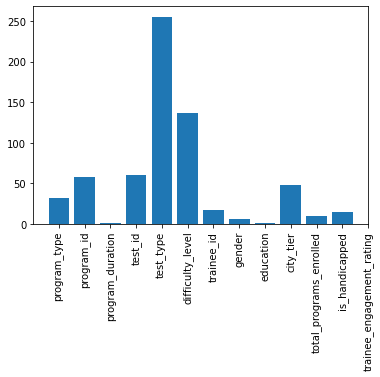

In [499]:
selector = SelectKBest(f_classif, k=5)
selector.fit(MFC[predictors],MFC["is_pass"])

scores = -np.log10(selector.pvalues_)
plt.bar(range(len(predictors)),  scores)
plt.xticks(range(len(predictors)), predictors,rotation='vertical')
plt.show()

### 选取重要的数据

In [500]:
predictors_crucial = ["test_type","difficulty_level","test_id","program_id","city_tier","program_type","age","trainee_id","is_handicapped", "total_programs_enrolled","gender"]

In [501]:
%%time
reg_select = RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=8,min_samples_leaf=4)
kf = model_selection.KFold(n_splits=3,random_state=1,shuffle=True)
reg_select.fit(MFC[predictors_crucial],MFC["is_pass"])
scores = model_selection.cross_val_score(reg_select,MFC[predictors_crucial],MFC["is_pass"],cv=kf)
print("准确率为："+str(scores.mean()))

准确率为：0.7144885795431817
Wall time: 6.72 s


## 集成多个算法

In [502]:
from sklearn.ensemble import GradientBoostingClassifier

In [503]:
%%time
algorithms = [[GradientBoostingClassifier(random_state=1,n_estimators=45,max_depth=6),["test_type","difficulty_level","test_id","program_id","city_tier","program_type","trainee_id","is_handicapped", "total_programs_enrolled","gender"]],[LogisticRegression(random_state=1,solver='liblinear'),["test_type","difficulty_level","test_id","program_id","city_tier","program_type","age","trainee_id","is_handicapped", "total_programs_enrolled","gender"]]]
kf = KFold(n_splits=5, random_state=1,shuffle=True)
predictions_ensemble = []

for train,test in kf.split(MFC):
    train_target = MFC["is_pass"].iloc[train]
    full_test_predictions = []
    for reg_ensemble,predictors_crucial in algorithms:
        reg_ensemble.fit(MFC[predictors_crucial].iloc[train,:],train_target)
        test_predictions5 = reg_ensemble.predict_proba(MFC[predictors_crucial].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions5)
        
  
    test_predictions5[test_predictions5 <=0.5] = 0
    test_predictions5[test_predictions5 > 0.5] = 1
    predictions_ensemble.append(test_predictions5)
    
predictions_ensemble = np.concatenate(predictions_ensemble, axis=0)

accuracy = sum(predictions_ensemble == MFC["is_pass"]) / len(predictions_ensemble)
print("准确率为",accuracy)

准确率为 0.6946077843113725
Wall time: 14.2 s


## 导入测试集

In [523]:
MFC_test = pd.read_csv("C:\\Users\\SilentCat\\Documents\\大一\\训练营\\中期考核\\data\\test\\test2.csv")

## 对测试数据集进行数据预处理

In [524]:
print(MFC_test.describe())

       program_duration       test_id    trainee_id     city_tier  \
count      11465.000000  11465.000000  11465.000000  11465.000000   
mean         128.179067     90.116616   9801.775142      2.232708   
std            6.890919     51.172182   5658.995423      1.012618   
min          117.000000      0.000000      1.000000      1.000000   
25%          121.000000     44.000000   5054.000000      1.000000   
50%          131.000000     89.000000   9580.000000      2.000000   
75%          134.000000    134.000000  14429.000000      3.000000   
max          136.000000    187.000000  20096.000000      4.000000   

               age  total_programs_enrolled  trainee_engagement_rating  \
count  7068.000000             11465.000000               11451.000000   
mean     36.352292                 2.581771                   2.382150   
std       8.993219                 1.229564                   1.314206   
min      17.000000                 1.000000                   1.000000   
25%     

In [525]:
#对缺失的数值类型的数据进行均值填充
MFC_test['program_duration'] = MFC_test['program_duration'].fillna(MFC_test['program_duration'].mean())
MFC_test['test_id'] = MFC_test['test_id'].fillna(MFC_test['test_id'].mean())
MFC_test['trainee_id'] = MFC_test['trainee_id'].fillna(MFC_test['city_tier'].mean())
MFC_test['age'] = MFC_test['age'].fillna(MFC_test['age'].mean())
MFC_test['total_programs_enrolled'] = MFC_test['total_programs_enrolled'].fillna(MFC_test['total_programs_enrolled'].mean())
MFC_test['trainee_engagement_rating'] = MFC_test['trainee_engagement_rating'].fillna(MFC_test['trainee_engagement_rating'].mean())
MFC_test['city_tier'] = MFC_test['city_tier'].fillna(MFC_test['city_tier'].mean())
print(MFC_test.describe())

       program_duration       test_id    trainee_id     city_tier  \
count      11465.000000  11465.000000  11465.000000  11465.000000   
mean         128.179067     90.116616   9801.775142      2.232708   
std            6.890919     51.172182   5658.995423      1.012618   
min          117.000000      0.000000      1.000000      1.000000   
25%          121.000000     44.000000   5054.000000      1.000000   
50%          131.000000     89.000000   9580.000000      2.000000   
75%          134.000000    134.000000  14429.000000      3.000000   
max          136.000000    187.000000  20096.000000      4.000000   

                age  total_programs_enrolled  trainee_engagement_rating  \
count  11465.000000             11465.000000               11465.000000   
mean      36.352292                 2.581771                   2.382150   
std        7.060975                 1.229564                   1.313403   
min       17.000000                 1.000000                   1.000000   
25%

### 对字符类型的数据进行处理

In [526]:
print(MFC_test['gender'].unique())

['F' 'M']


In [527]:
gender_count1 = MFC_test['gender'].value_counts()
print(gender_count1)

M    6092
F    5373
Name: gender, dtype: int64


In [528]:
MFC_test['gender'] = MFC_test['gender'].fillna('M')
#并对gender进行独热编码
MFC_test.loc[MFC_test['gender'] == 'M', 'gender'] = 0 
MFC_test.loc[MFC_test['gender'] == 'F', 'gender'] = 1 

In [529]:
print(MFC_test['program_type'].unique())

['T' 'Y' 'Z' 'V' 'X' 'U' 'S']


In [530]:
type_count1 = MFC_test['program_type'].value_counts()
print(type_count1)

Y    3479
T    2933
V    2068
U    1229
Z    1005
X     525
S     226
Name: program_type, dtype: int64


In [531]:
MFC_test['program_type'] = MFC_test['program_type'].fillna('Y')
#并对program_type进行独热编码
MFC_test.loc[MFC_test['program_type'] == 'Y', "program_type"] = 0 
MFC_test.loc[MFC_test['program_type'] == 'T', "program_type"] = 1
MFC_test.loc[MFC_test['program_type'] == 'V', "program_type"] = 2
MFC_test.loc[MFC_test['program_type'] == 'U', "program_type"] = 3
MFC_test.loc[MFC_test['program_type'] == 'Z', "program_type"] = 4
MFC_test.loc[MFC_test['program_type'] == 'X', "program_type"] = 5
MFC_test.loc[MFC_test['program_type'] == 'S', "program_type"] = 6

In [532]:
print(MFC_test['test_type'].unique())

['online' 'offline']


In [533]:
test_count1 = MFC_test['test_type'].value_counts()
print(test_count1)

offline    6830
online     4635
Name: test_type, dtype: int64


In [534]:
MFC_test['test_type'] = MFC_test['test_type'].fillna('offline')
#并对test_type进行独热编码
MFC_test.loc[MFC_test['test_type'] == 'offline', "test_type"] = 0 
MFC_test.loc[MFC_test['test_type'] == 'online', "test_type"] = 1 

In [535]:
print(MFC_test['difficulty_level'].unique())

['easy' 'intermediate' 'hard' 'vary hard']


In [536]:
level_count1 = MFC_test['difficulty_level'].value_counts()
print(level_count1)

easy            6342
intermediate    3196
hard            1593
vary hard        334
Name: difficulty_level, dtype: int64


In [537]:
MFC_test['difficulty_level'] = MFC_test['difficulty_level'].fillna('easy')
#并对difficulty_level进行独热编码
MFC_test.loc[MFC_test['difficulty_level'] == 'easy', "difficulty_level"] = 0 
MFC_test.loc[MFC_test['difficulty_level'] == 'intermediate', "difficulty_level"] = 1
MFC_test.loc[MFC_test['difficulty_level'] == 'hard', "difficulty_level"] = 2
MFC_test.loc[MFC_test['difficulty_level'] == 'vary hard', "difficulty_level"] = 3

In [538]:
print(MFC_test['education'].unique())

['Bachelors' 'Matriculation' 'High School Diploma' 'No Qualification'
 'Masters']


In [539]:
edu_count1 = MFC_test['education'].value_counts()
print(edu_count1)

High School Diploma    5353
Matriculation          4136
Bachelors              1810
No Qualification         95
Masters                  71
Name: education, dtype: int64


In [540]:
MFC_test['education'] = MFC_test['education'].fillna('High School Diploma')
#并对eduaction进行独热编码
MFC_test.loc[MFC_test['education'] == 'High School Diploma', "education"] = 0 
MFC_test.loc[MFC_test['education'] == 'Matriculation', "education"] = 1
MFC_test.loc[MFC_test['education'] == 'Bachelors', "education"] = 2
MFC_test.loc[MFC_test['education'] == 'Masters', "education"] = 3
MFC_test.loc[MFC_test['education'] == 'No Qualification', "education"] = 4

In [541]:
print(MFC_test["program_id"].unique())

['T_3' 'Y_2' 'Y_4' 'Z_2' 'T_4' 'Z_3' 'T_2' 'V_4' 'V_2' 'Y_1' 'V_1' 'V_3'
 'X_1' 'U_1' 'Y_3' 'T_1' 'Z_1' 'X_3' 'S_1' 'U_2' 'S_2' 'X_2']


In [542]:
id_count1 = MFC_test['program_id'].value_counts()
print(id_count1)

T_3    1034
Y_3    1025
Y_1    1016
Y_4     792
T_4     750
U_1     739
T_2     688
V_4     655
Y_2     646
V_3     569
V_1     546
U_2     490
T_1     461
Z_3     409
Z_2     332
V_2     298
Z_1     264
X_3     202
X_1     188
X_2     135
S_2     127
S_1      99
Name: program_id, dtype: int64


In [543]:
MFC_test['program_id'] = MFC_test['program_id'].fillna('Y_1')
#并对program_id进行独热编码
MFC_test.loc[MFC_test['program_id'] == 'Y_1', "program_id"] = 0 
MFC_test.loc[MFC_test['program_id'] == 'Y_3', "program_id"] = 1
MFC_test.loc[MFC_test['program_id'] == 'T_3', "program_id"] = 2
MFC_test.loc[MFC_test['program_id'] == 'Y_4', "program_id"] = 3
MFC_test.loc[MFC_test['program_id'] == 'T_4', "program_id"] = 4
MFC_test.loc[MFC_test['program_id'] == 'U_1', "program_id"] = 5
MFC_test.loc[MFC_test['program_id'] == 'V_4', "program_id"] = 6
MFC_test.loc[MFC_test['program_id'] == 'Y_2', "program_id"] = 7
MFC_test.loc[MFC_test['program_id'] == 'T_2', "program_id"] = 8
MFC_test.loc[MFC_test['program_id'] == 'V_1', "program_id"] = 9
MFC_test.loc[MFC_test['program_id'] == 'V_3', "program_id"] = 10
MFC_test.loc[MFC_test['program_id'] == 'T_1', "program_id"] = 11
MFC_test.loc[MFC_test['program_id'] == 'U_2', "program_id"] = 12
MFC_test.loc[MFC_test['program_id'] == 'Z_3', "program_id"] = 13
MFC_test.loc[MFC_test['program_id'] == 'Z_2', "program_id"] = 14
MFC_test.loc[MFC_test['program_id'] == 'Z_1', "program_id"] = 15
MFC_test.loc[MFC_test['program_id'] == 'V_2', "program_id"] = 16
MFC_test.loc[MFC_test['program_id'] == 'X_1', "program_id"] = 17
MFC_test.loc[MFC_test['program_id'] == 'X_3', "program_id"] = 18
MFC_test.loc[MFC_test['program_id'] == 'X_2', "program_id"] = 19
MFC_test.loc[MFC_test['program_id'] == 'S_2', "program_id"] = 20
MFC_test.loc[MFC_test['program_id'] == 'S_1', "program_id"] = 21

In [544]:
print(MFC_test['is_handicapped'].unique())

['N' 'Y']


In [545]:
hand_count1 = MFC_test['is_handicapped'].value_counts()
print(hand_count1)

N    10454
Y     1011
Name: is_handicapped, dtype: int64


In [546]:
MFC_test['is_handicapped'] = MFC_test['is_handicapped'].fillna('N')
#并对is_handicapped进行独热编码
MFC_test.loc[MFC_test['is_handicapped'] == 'N', "is_handicapped"] = 0 
MFC_test.loc[MFC_test['is_handicapped'] == 'Y', "is_handicapped"] = 1

In [547]:
print(MFC_test.isnull().any())#查看是否还存在缺失值

id_num                       False
program_type                 False
program_id                   False
program_duration             False
test_id                      False
test_type                    False
difficulty_level             False
trainee_id                   False
gender                       False
education                    False
city_tier                    False
age                          False
total_programs_enrolled      False
is_handicapped               False
trainee_engagement_rating    False
is_pass                       True
dtype: bool


### 将预测值填充进csv中

In [548]:
predictions1 = [] 
for test1 in kf.split(MFC_test):
    test_predictions = 模型名(MFC_test[predictors])
    predictions1.append(test_predictions)
    
predictions1 = np.concatenate(predictions1, axis=0)
predictions1[predictions1 > 0.5] = 1
predictions1[predictions1 <= 0.5] = 0


In [549]:
MF = MFC_test.drop(['program_type'], axis=1)
MF = MF.drop(['program_id'], axis=1)
MF = MF.drop(['program_duration'], axis=1)
MF = MF.drop(['test_id'], axis=1)
MF = MF.drop(['test_type'], axis=1)
MF = MF.drop(['difficulty_level'], axis=1)
MF = MF.drop(['trainee_id'], axis=1)
MF = MF.drop(['gender'], axis=1)
MF = MF.drop(['education'], axis=1)
MF = MF.drop(['city_tier'], axis=1)
MF = MF.drop(['age'], axis=1)
MF = MF.drop(['total_programs_enrolled'], axis=1)
MF = MF.drop(['is_handicapped'], axis=1)
MF = MF.drop(['trainee_engagement_rating'], axis=1)


In [550]:
re_list = []
for i in predictions1:
   re_list.append(i) 

In [551]:
for i in range(0,11464):
    MF['is_pass'].at[i] = re_list[i]#将预测值填充进测试数据集里面去


In [552]:
MF.head(11684) #查看是否将['is_pass']的预测值填充进去

,id_num,is_pass
0,4753_31,1.0
1,10816_148,1.0
2,7498_114,1.0
3,14139_175,1.0
4,11305_25,1.0
...,...,...
11460,1612_108,1.0
11461,17726_44,1.0
11462,8272_131,1.0
11463,10621_166,1.0


In [553]:
MF.to_csv("submission1_1.csv",index = False)